We start off by importing `pandas`, which will allow us to extract, aggregate, and analyze our data. We also need to import   `matplotlib` since we need to visualize the data as well.

The aesthetic of the visualizations are altered as well. The size of the legend, axis, ticks, and font are all altered. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', size=12) # font size 
plt.rc('axes', labelsize=14, titlesize=14) # font size of axis and label titles 
plt.rc('legend', fontsize=12) # font size of legend
plt.rc('xtick', labelsize=5) # size of ticks on x-axis
plt.rc('ytick', labelsize=10) # size of ticks on y-axis

I decided to use a dataset from Kaggle of the first 7 generations of Pokemon. Pokemon is a really old video game franchise and essentially any time a new game was made, they would come up new Pokemon. The new Pokemon for the game would comprise of a generation and usually there's around 100 or more Pokemon per generation. This dataset shows basic information about Pokemon such as their names, weight, height, and number in the Pokedex. Additionally, it includes information that can be interesting to analyze when aggregated, such as attack, defense, hit points (HP), generation, if they are considered legendary, and much more.

Here, we are loading the csv file and converting it into a `pandas` Series so that it can be examined. 

In [3]:
data_source_raw = "../../datasets/pokemon.csv"
data_source_result = pd.read_csv(data_source_raw)
data_source_result

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,49,5120,70,318,45,49,1059860,0.7,45,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,62,5120,70,405,45,63,1059860,1.0,60,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,100,5120,70,625,45,123,1059860,2.0,80,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,52,5120,70,309,45,43,1059860,0.6,39,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,64,5120,70,405,45,58,1059860,1.1,58,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,101,30720,0,570,25,103,1250000,9.2,97,Celesteela,NaN,797,107,101,61,steel,flying,999.9,7,1
797,181,30720,0,570,255,131,1250000,0.3,59,Kartana,NaN,798,59,31,109,grass,steel,0.1,7,1
798,101,30720,0,570,15,53,1250000,5.5,223,Guzzlord,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,107,30720,0,600,3,101,1250000,2.4,97,Necrozma,NaN,800,127,89,79,psychic,NaN,230.0,7,1


Taking a look at the data above, we can see there are 20 columns total. We can then run the `info()` command on the dataset to get a breakdown of datatypes and more.

As shown below, 16 of the 20 columns are numerical values. Of the 16, most of them are *discrete variables*  since they are integer values such as:
- `attack`
- `base_egg_steps`
- `base_happiness`
- `base_total`
- `defense`
- `experience_growth`
- `hp`
- `pokedex_number`
- `sp_attack`
- `sp_defense`
- `speed`
- `generation`
- `is_legendary`

The others are *continuous variables* because they can take on an infinite number of values within a given range:

- `height_m`
- `percentage_male`
- `weight_kg`

In [4]:
data_source_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   attack             801 non-null    int64  
 1   base_egg_steps     801 non-null    int64  
 2   base_happiness     801 non-null    int64  
 3   base_total         801 non-null    int64  
 4   capture_rate       801 non-null    object 
 5   defense            801 non-null    int64  
 6   experience_growth  801 non-null    int64  
 7   height_m           781 non-null    float64
 8   hp                 801 non-null    int64  
 9   name               801 non-null    object 
 10  percentage_male    703 non-null    float64
 11  pokedex_number     801 non-null    int64  
 12  sp_attack          801 non-null    int64  
 13  sp_defense         801 non-null    int64  
 14  speed              801 non-null    int64  
 15  type1              801 non-null    object 
 16  type2              417 non

Getting specific columns that are important. 

There's a lot of information in this file, with a lot of it being unnecessary at the moment.

As a result, we're going to filter for specific columns and we're going to rename the columns. In this code, we filter for the `generation` and `is_legendary` column so we don't have to rename every single column. Instead, we're just renaming the columns that are important to us. We rename `generation` to `Generation` and `is_legendary` to `Legendary`

In [7]:
generation_legends = data_source_result[["generation", "is_legendary"]]
generation_legends = generation_legends.rename(columns={'is_legendary':"Legendary", 'generation':"Generation"})

Afterwards, we determine how many legendary Pokemon are there for each generation.

In this example, `generation` represents a discrete variable since it exists as an integer within a fixed range of 1-7. 

We find that the generation with the most legenedary Pokemon is generation 7. This is done by running the `groupby()` function on the `generation` column then subsequently running `agg` to find the number of legendary pokemon.

Once we sort, it becomes increasingly clear which that Generations 7, 4, 5 are the most ripe with legendary Pokemon

In [13]:
legendary_per_generation = generation_legends.groupby("Generation").agg({"Legendary":"sum", "Generation":"first"})
legendary_per_generation[['Legendary']].sort_values(by="Legendary", ascending=False)

,Legendary
Generation,
7,17
4,13
5,13
3,10
2,6
6,6
1,5


Getting the data, we can now visualize it on a bar graph to compare the number of legendary pokemon across generation.

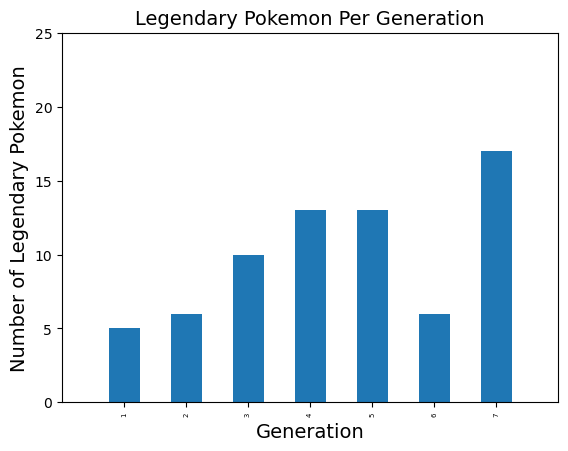

In [20]:
legendary_per_generation.plot(kind="bar", x="Generation", y="Legendary", title="Legendary Pokemon Per Generation", ylabel="Number of Legendary Pokemon", legend=False)
plt.axis([-1,7 , 0, 25])
plt.show()

So we've simply pointed out discrete variables and continuous variables here. We've managed to create a discrete variable by counting the number of legendary Pokemon. But what does this have to do with probability? Well we can take a closer look at Pokemon from a specific generation and break it down further. Here we can figure out what are the odds that a Pokemon from Generation 7 is classified as Legendary?

We've already imported everything we need, so we need to start by filtering by the generation. Here we have filtered so that only Pokemon from generation 7 will appear.

In [21]:
generation_num = 7
gen7_pokemon = data_source_result[data_source_result['generation']==generation_num]


Now that we've gotten the specific Pokemon that we want, we also need to get the column we want. Here we are using the `is_legendary` column because we are evaluating which Pokemon are and aren't legendary. While we could get the count of each, it is probably more meaningful to get percentage breakdowns of them. As a result, we use `value_counts` to get the probability of 0 or 1, but we also normalize the results so as to get percentage values rather than just a count.

In [22]:
legendary_pokemon = gen7_pokemon['is_legendary']
legendary_percentages = legendary_pokemon.value_counts(normalize=True)

 From there, we use 0 and 1 as index values and the percentages that were calculated earlier are used as the values. 

In [23]:

legendary_percentages = pd.Series(legendary_percentages.values, index=legendary_pokemon.unique())
legendary_percentages

0    0.7875
1    0.2125
dtype: float64

From there, I created a pie graph since we're only comparing 2 values. As we can see, there is 78.75% non-legendary Pokemon and 21.25% legendary Pokemon in Generation 7

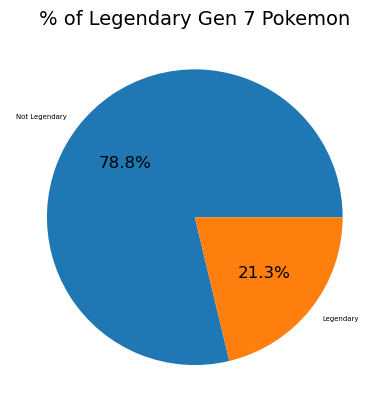

In [24]:

legendary_percentages.plot(kind="pie", ylabel="", title="% of Legendary Gen 7 Pokemon", labels=["Not Legendary", "Legendary"], autopct='%.1f%%')
plt.show()

We could also factor in conditional probablity and Bayes' Theorem. If we were to play a guessing game for every single Pokemon in this dataset, guessing the right Pokemon would be really challenging because there is over 800 Pokemon. We would have only a 0.12% chance of guessing right!

In [54]:
total_num_pokemon = data_source_result['pokedex_number'].count()
1/total_num_pokemon * 100

0.12484394506866417

But what if we found out that the Pokemon is in Generation 1 and is also a legendary pokemon? That would certainly increase our odds!

Here we can filter for Pokemon that appear in Generation 1, filter for the legendary Pokemon, and then get the count which is 5. 

In [55]:
gen1_pokemon = data_source_result[data_source_result['generation']==1]
legendary_gen1 = gen1_pokemon[gen1_pokemon['is_legendary']==1]
legendary_gen1_count = legendary_gen1['name'].count()



We then do 1 divided by the count to get our new odds. We have improved our guessing odds from 0.1% to 20%!

In [56]:
1/legendary_gen1_count * 100

20.0

This showcasing *Bayes' Theorem*, which suggests bringing in new evidence will effect the outcome of the event. In our case, we found out that the Pokemon we were looking for is in Generation 1 and Legendary. This narrowed down the choices Pokemon we can guess from